In [1]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from pylab import rcParams


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rcParams['figure.figsize'] = 8,6

# Part 1: Math Scores Dataset

### Part 1A: Prediction

In [3]:
df_por=pd.read_csv("student-mat.csv",sep=';')

In [4]:
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

**After conducting some Exploration of the Dataset, we will be dropping some of the features from the dataset for various reasons, including not enough correlation or for some categorical variables, most features being biased towards one category or outliers**

In [5]:
df_por.drop(columns=["school","Dalc","Walc","reason","famsize","absences","health","Mjob","Fjob","activities","guardian","famsup","schoolsup","freetime"],inplace=True)

**We'll be saving our response variable G3 in y**

In [6]:
y=df_por['G3']
x=df_por.drop(columns=["G3"])
#imp sex,age,address,Pstatus,Medu,Fedu, traveltime,studytime,failures,paid,nursery,higher,internet,romantic,famrel,goout,

In [7]:
x_dummies=pd.get_dummies(x,drop_first=True)
x_dummies.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,G1,G2,sex_M,address_U,Pstatus_T,paid_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,4,5,6,0,1,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,5,5,0,1,1,0,0,1,1,0
2,15,1,1,1,2,3,4,2,7,8,0,1,1,1,1,1,1,0
3,15,4,2,1,3,0,3,2,15,14,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,2,6,10,0,1,1,1,1,1,0,0


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x_dummies,y,random_state=7,test_size=0.20)

In [9]:
scaler=StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [10]:
#Using Linear regression with all variables as features

model = linear_model.LinearRegression().fit(X = x_train, y = y_train)
y_pred=model.predict(x_test)
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-18-1)
print("r2:",r2,"Adjusted r2",r2_adj)
print("\nCoef:",model.coef_)

r2: 0.8622378053506752 Adjusted r2 0.8209091469558777

Coef: [-0.22217451  0.22691809 -0.23945471  0.17595759 -0.11393558 -0.10808299
  0.33469327  0.08181882  0.56324525  3.69388265  0.02288754  0.01498383
 -0.1029313   0.0144894  -0.04438525  0.01368526 -0.08502252 -0.12810237]


In [11]:
#Using Ridge regression with all variables

model = linear_model.Ridge(alpha=1).fit(X = x_train, y = y_train)
y_pred=model.predict(x_test)
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-18-1)
print("r2:",r2,"Adjusted r2",r2_adj)
print("\nCoef:",model.coef_)

r2: 0.8626495880240875 Adjusted r2 0.8214444644313138

Coef: [-0.22304644  0.22720323 -0.23970132  0.17313901 -0.11321803 -0.10940086
  0.33232088  0.07975144  0.59091314  3.65601576  0.02497394  0.01718945
 -0.10390344  0.01698479 -0.04523929  0.01374175 -0.08327956 -0.13098296]


In [12]:
#Using Lasso regression with all variables

model = linear_model.Lasso(alpha=1).fit(X = x_train, y = y_train)
y_pred=model.predict(x_test)
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-18-1)
print("r2:",r2,"Adjusted r2",r2_adj)
print("\nCoef:",model.coef_)

r2: 0.8355957488707786 Adjusted r2 0.7862744735320122

Coef: [-0.          0.          0.          0.          0.         -0.
  0.         -0.          0.          3.20284292  0.          0.
 -0.          0.          0.          0.          0.         -0.        ]


**As we can see, initially when we use all features as input, Ridge regression gives out the best score, Lasso Regression performs the worst, possibly because it is ignoring all features except "G2". Henceforth, we'll be using Ridge Regression to work out which features work best by comparing the adjusted r2 value for different features**

In [13]:
#Using earlier grades G1 and G2 as features to predict G3
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[8,9]], y = y_train)
y_pred=model.predict(x_test[:,[8,9]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-2-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8772557652626836 Adjusted r2 0.8740256538222279


In [14]:
#Using the first half of the features to predict G3

model = linear_model.Ridge(alpha=1).fit(X = x_train[:,0:9], y = y_train)
y_pred=model.predict(x_test[:,0:9])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-9-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.7354284615561759 Adjusted r2 0.7009191304548076


In [15]:
#Using the second half of the features to predict G3

model = linear_model.Ridge(alpha=1).fit(X = x_train[:,9:], y = y_train)
y_pred=model.predict(x_test[:,9:])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-11-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8725884348934363 Adjusted r2 0.8516701182341497


In [16]:
#Using earlier grades G1,G2, address (Urban Vs Rural),Pstatus(together vs apart)  as features
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[8,9,11,12]], y = y_train)
y_pred=model.predict(x_test[:,[8,9,11,12]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-4-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8784772500758331 Adjusted r2 0.8719084527826348


In [17]:
#Using earlier grades G1,G2, sex  as features with Ridge Regression
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[8,9,10]], y = y_train)
y_pred=model.predict(x_test[:,[8,9,10]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-3-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8766906979919994 Adjusted r2 0.8717583259116793


In [18]:
#Using earlier grades G1,G2 and failures as features
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[5,8,9]], y = y_train)
y_pred=model.predict(x_test[:,[5,8,9]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-3-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8801116080176705 Adjusted r2 0.8753160723383774


In [19]:

#Using earlier grades G1,G2 and studytime as features
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[4,8,9]], y = y_train)
y_pred=model.predict(x_test[:,[4,8,9]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-3-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8800402477091231 Adjusted r2 0.8752418576174881


In [20]:
#Using age,earlier grades G1,G2,age studytime, and failures as features
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[0,4,5,8,9]], y = y_train)
y_pred=model.predict(x_test[:,[0,4,5,8,9]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-5-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8789472420177987 Adjusted r2 0.8706559572244973


In [21]:
#Using earlier grades G1,G2, studytime, and failures as features
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[4,5,8,9]], y = y_train)
y_pred=model.predict(x_test[:,[4,5,8,9]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-4-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8837685221670176 Adjusted r2 0.877485739581451


**From the various combinations of variables used above, we got the best regression model using the Earlier grades G1,G2,studytime,failures as our predictor variables for the response variable G3 (final grades).
The adjusted r2 for this model is .877**

### Part 1B: Clustering


In [22]:
scaler=StandardScaler().fit(x_dummies)
x_clustering=scaler.transform(x_dummies)
x_dummies.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,G1,G2,sex_M,address_U,Pstatus_T,paid_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,4,5,6,0,1,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,5,5,0,1,1,0,0,1,1,0
2,15,1,1,1,2,3,4,2,7,8,0,1,1,1,1,1,1,0
3,15,4,2,1,3,0,3,2,15,14,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,2,6,10,0,1,1,1,1,1,0,0


**Clustering with G1,G2,address(Urban/rural), Pstatus(parent status together/apart),higher(going to pursue higher education)**

In [23]:
#We will use the silhoutte score to determine the appropriate number of clusters
x_subset=x_clustering[:,[8,9,11,12,15]]
k_range=range(3,9)
for k in k_range:
    clustering = KMeans(n_clusters = k, init = 'k-means++', n_init = 10).fit(x_subset)
    clusters=clustering.labels_
    print(metrics.silhouette_score(x_subset, clusters, metric = "euclidean"),"k:",k)

0.3439697699629334 k: 3
0.4107441952239975 k: 4
0.49926848699158877 k: 5
0.5048366005218269 k: 6
0.4443489716201931 k: 7
0.4636618428607664 k: 8


**We can conclude that there are 6 clusters for the chosen subset**

In [24]:
#kmeans
clustering = KMeans(n_clusters = 6, init = 'k-means++', n_init = 10).fit(x_subset)
clusters=clustering.labels_
df2=x
df2["clusters"] = pd.Series(clusters)

Text(0.5, 0, 'Cluster')

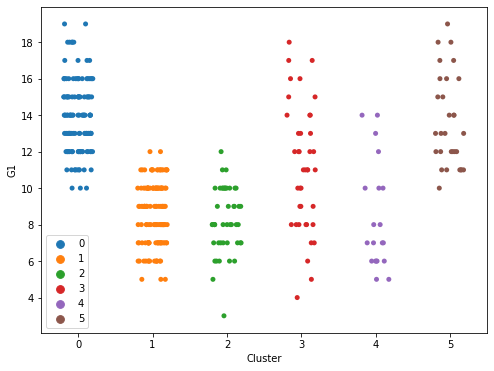

In [25]:
#clusters by Grade 1
sns.stripplot('clusters', 'G1', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


Text(0.5, 0, 'Cluster')

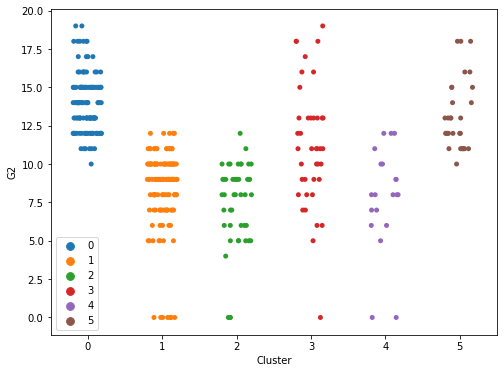

In [26]:
#Viewing clusters by Grade 2
sns.stripplot('clusters', 'G2', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


In [27]:
#using agglomerative clustering for the chosen subset

clustering = AgglomerativeClustering(n_clusters=6,linkage="ward").fit(x_subset)
clusters=clustering.labels_
df2=x
df2["clusters"] = pd.Series(clusters)

Text(0.5, 0, 'Cluster')

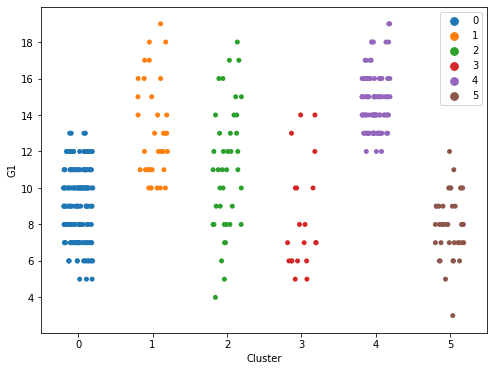

In [28]:
#clusters by Grade 1
sns.stripplot('clusters', 'G1', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


Text(0.5, 0, 'Cluster')

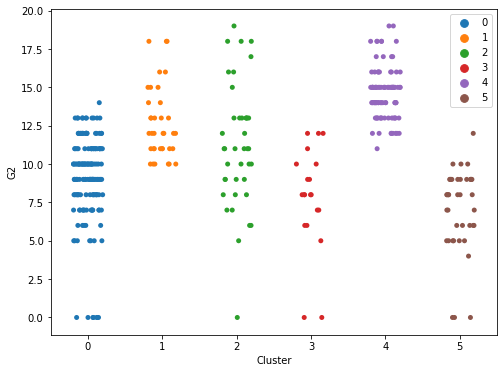

In [29]:
#Viewing clusters by Grade 2
sns.stripplot('clusters', 'G2', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


*Looking at the plots, we can see that from the 6 identified clusters, 2 are relatively high schoring, 2 are low scoring, one is relatively average scoring and one has a lot of variation and includes really high scoring students as well as low scoring students*


*Additionally, from the plots above we can conclude that Kmeans and agglomerative clustering have similar results for the given dataset. Henceforth, we'll be using KMeans. We will not be using DBSCAN as it has problems with a large number of features.*

**Clustering with famrel(quality of family relationship),and paid(availing extra paid support)) as the features**

In [30]:
#We will use the silhoutte score to determine the appropriate number of clusters
x_subset=x_clustering[:,[5,13]]
k_range=range(3,10)
for k in k_range:
    clustering = KMeans(n_clusters = k, init = 'k-means++', n_init = 10).fit(x_subset)
    clusters=clustering.labels_
    print(metrics.silhouette_score(x_subset, clusters, metric = "euclidean"),"k:",k)

0.830540198862114 k: 3
0.9067468738168194 k: 4
0.9485956999104976 k: 5
0.9684992982856003 k: 6
0.9925974661898359 k: 7
1.0 k: 8
1.0 k: 9


C:\Users\Parikshit\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


**We can conclude that there are 8 clusters for the chosen subset**

In [31]:
#kmeans
clustering = KMeans(n_clusters = 8, init = 'k-means++', n_init = 10).fit(x_subset)
clusters=clustering.labels_
df2=x
df2["clusters"] = pd.Series(clusters)

Text(0.5, 0, 'Cluster')

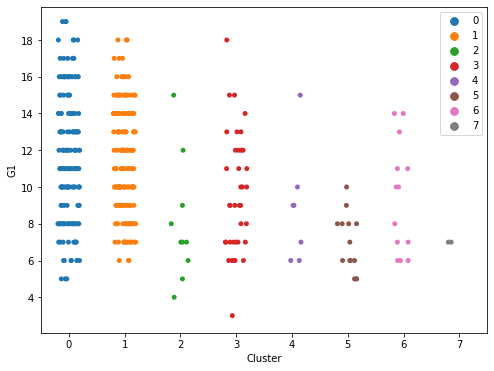

In [32]:
#View clusters by Grade 1
sns.stripplot('clusters', 'G1', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


Text(0.5, 0, 'Cluster')

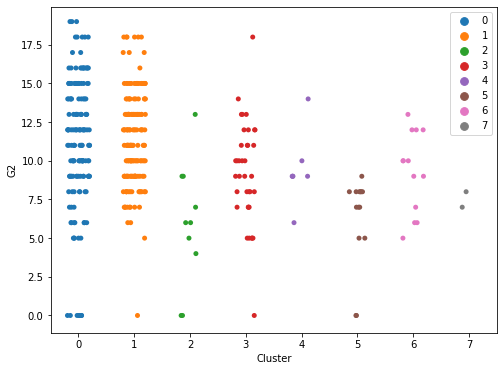

In [33]:
#View clusters by Grade 2
sns.stripplot('clusters', 'G2', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


*While the silhouette score for the clustering is perfect, there is not a clear pattern for a cluster in terms of the G1 and G2 scores*

**Clustering with address_U, Pstatus_T, paid_yes, nursery_yes, and internet_yes as the input features.**

In [34]:
#We will use the silhoutte score to determine the appropriate number of clusters
x_subset=x_clustering[:,[11,12,13,14,16]]
k_range=range(3,11)
for k in k_range:
    clustering = KMeans(n_clusters = k, init = 'k-means++', n_init = 10).fit(x_subset)
    clusters=clustering.labels_
    print(metrics.silhouette_score(x_subset, clusters, metric = "euclidean"),"k:",k)

0.41337136450007106 k: 3
0.4645126407864241 k: 4
0.5713520222780162 k: 5
0.6758552476808202 k: 6
0.708868835628035 k: 7
0.7515811644978484 k: 8
0.7694497145961351 k: 9
0.8081895907398493 k: 10


**We will use 10 as the number of clusters for the selected subset**

In [35]:
#kmeans
clustering = KMeans(n_clusters = 10, init = 'k-means++', n_init = 10).fit(x_subset)
clusters=clustering.labels_
df2=x
df2["clusters"] = pd.Series(clusters)

Text(0.5, 0, 'Cluster')

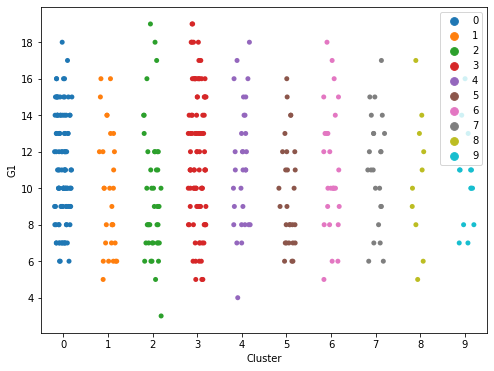

In [36]:
#View clusters by Grade 1
sns.stripplot('clusters', 'G1', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


Text(0.5, 0, 'Cluster')

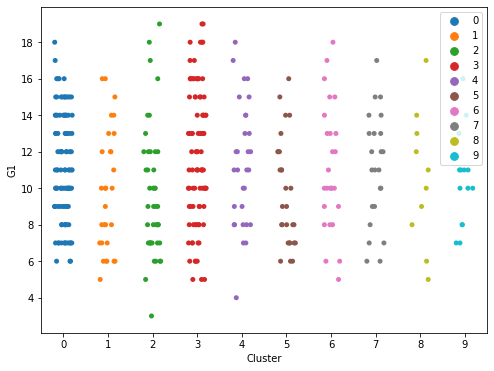

In [37]:
#View clusters by Grade 2
sns.stripplot('clusters', 'G1', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


*While the silhouette score for the clustering is good, there is not a clear pattern for a cluster in terms of the G1 and G2 scores and these are virtually equally distributed across clusters*

**Using G1 and G2 as features to cluster on**

In [38]:
#We will use the silhoutte score to determine the appropriate number of clusters
x_subset=x_clustering[:,[8,9]]
k_range=range(3,11)
for k in k_range:
    clustering = KMeans(n_clusters = k, init = 'k-means++', n_init = 10).fit(x_subset)
    clusters=clustering.labels_
    print(metrics.silhouette_score(x_subset, clusters, metric = "euclidean"),"k:",k)

0.4475865295684319 k: 3
0.44295710066063393 k: 4
0.436816677150435 k: 5
0.42342624489077335 k: 6
0.4028986202420954 k: 7
0.38459442801434623 k: 8
0.3854052385377234 k: 9
0.4000907723590527 k: 10


**We will use 4 as the number of clusters**

In [39]:
#kmeans
clustering = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10).fit(x_subset)
clusters=clustering.labels_
df2=x
df2["clusters"] = pd.Series(clusters)

Text(0.5, 0, 'Cluster')

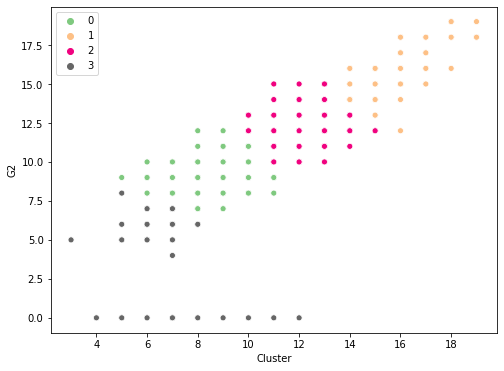

In [40]:
#View scatterplot for the clusters
sns.scatterplot('G1', 'G2', data=df2, hue=clusters,palette="Accent")
plt.xlabel("Cluster")


**We can clearly see the clusters aligning here, from lower scores for both g1 and g2 to higher scores, with little to no overlap.**